In [1]:
pip install tensorflow


  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.7-py2.py3-none-any.whl.metadata (849 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.10.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.62.1-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)

In [26]:
img_height = img_width =224

In [27]:
import csv
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory


data_dir = r"C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train"  


target_size = (224, 224)  
batch_size = 32  

train_df = image_dataset_from_directory(data_dir,labels="inferred",
                                        label_mode="binary",shuffle=True,seed=12,validation_split= 0.15,
                                        subset="training",image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 1924 files belonging to 2 classes.
Using 1636 files for training.


In [28]:
class_names = train_df.class_names

In [29]:
import numpy as np

for images in train_df:
  
  for i in range(len(images)):
    image = np.array(images[i])  # Convert image to NumPy array

None


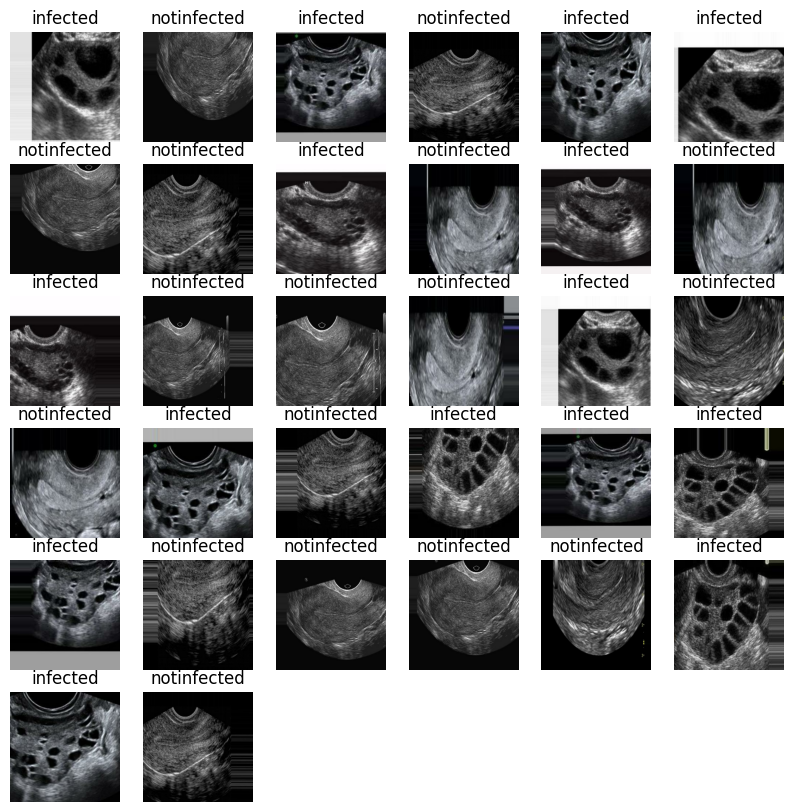

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_df.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

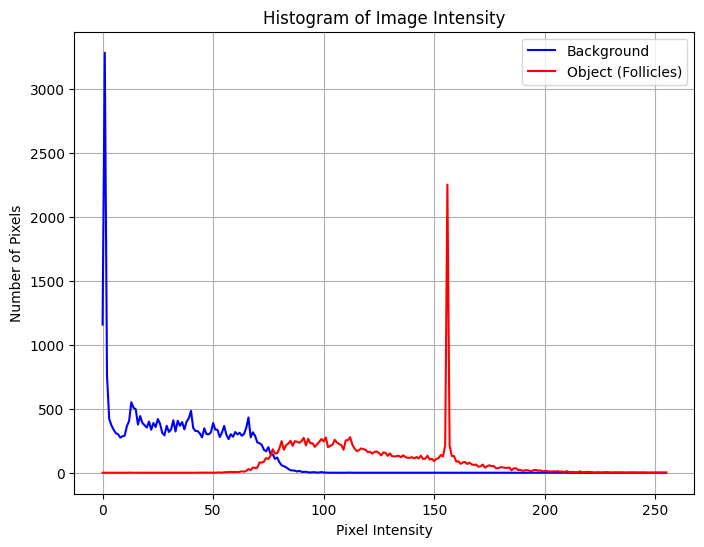

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread(r"C:\Users\KIIT\Desktop\PCOS detection\data\train\infected\img_0_74.jpg", cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Apply Gaussian blur to smooth out noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Apply Otsu's thresholding
    _, segmented_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Calculate histograms for background and object (follicles)
    hist_object = cv2.calcHist([image], [0], segmented_image, [256], [0, 256])
    hist_bg = cv2.calcHist([image], [0], 255 - segmented_image, [256], [0, 256])  # Invert mask for object
    
    # Plot histograms
    plt.figure(figsize=(8, 6))
    plt.plot(hist_bg, color='blue', label='Background')
    plt.plot(hist_object, color='red', label='Object (Follicles)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Number of Pixels')
    plt.title('Histogram of Image Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()
    


In [10]:
pip install opencv-python


  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


### Images after OTSU thresholding and canny edge detection 
#### Image segmentation (Infected) 

In [2]:
import cv2
import numpy as np
import os

input_dir = r"C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train\infected"
output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected"

image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is not None:
        blurred_image = cv2.GaussianBlur(image, (3, 3), 0)
        kernel = np.ones((3, 3), np.float32) / 9
        averaged_image = cv2.filter2D(blurred_image, -1, kernel)
        _, thresholded_image = cv2.threshold(averaged_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        inverted_thresholded_image = 255 - thresholded_image
        
        edges = cv2.Canny(inverted_thresholded_image, 10, 200)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        edge_output_path = os.path.join(output_dir, "Edges_" + image_file)
        cv2.imwrite(edge_output_path, edges)
        
        print("Edge-detected image saved:", edge_output_path)

print("Segmentation completed and images saved")


Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img1.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img10.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img2.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img3.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img4.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img5.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img6.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_2\infected\Edges_img7.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8403.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8428.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8429.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8431.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8449.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8459.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8469.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_8472.jpg
Edge-detected image saved: C:\Users\KIIT

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_92.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_9207.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_9208.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_9218.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_9255.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_9275.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_9277.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\infected\Edges_img_0_9323.jpg
Edge-detected image saved: C:\Users\KIIT\D

#### Follicle Extraction (infected)

In [32]:

input_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\train\infected"
output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\train_4\infected"
follicles_output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_infected"

image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

        kernel = np.ones((3, 3), np.float32) / 9
        averaged_image = cv2.filter2D(blurred_image, -1, kernel)

        _, thresholded_image = cv2.threshold(averaged_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        inverted_thresholded_image = 255 - thresholded_image

        edges = cv2.Canny(inverted_thresholded_image, 10, 200)

        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        edge_output_path = os.path.join(output_dir, "Edges_" + image_file)
        cv2.imwrite(edge_output_path, edges)

        if contours:
            contour_list = [contour for contour in contours if cv2.contourArea(contour) > 100]

            for idx, contour in enumerate(contour_list):
                x, y, w, h = cv2.boundingRect(contour)

                w_ex = int(w * 1.2)
                h_ex = int(h * 1.2)

                follicle_image = inverted_thresholded_image[y - int(h_ex / 4):y + h + int(h_ex / 4),
                               x - int(w_ex / 4):x + w + int(w_ex / 4)]

                if follicle_image.size != 0:
                    follicle_output_path = os.path.join(follicles_output_dir, f"Follicle_{image_file[:-4]}_{idx}.png")

                    cv2.imwrite(follicle_output_path, follicle_image)
                    print(f"Follicle image saved: {follicle_output_path}")

Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img1_0.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img1_1.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img1_2.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img1_3.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img1_4.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img10_0.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img10_1.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\Follicle_img10_2.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\follicle_image2\

#### Image segmentation (Not infected)

In [19]:

input_dir = r"C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train\notinfected"
output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected"

image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is not None:
      
        blurred_image = cv2.GaussianBlur(image, (3, 3), 0)
        
       
        kernel = np.ones((3, 3), np.float32) / 9
        averaged_image = cv2.filter2D(blurred_image, -1, kernel)
        
        _, thresholded_image = cv2.threshold(averaged_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
       
        inverted_thresholded_image = 255 - thresholded_image
        
        edges = cv2.Canny(inverted_thresholded_image, 10, 200)  # Adjust thresholds as needed
        
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        
        edge_output_path = os.path.join(output_dir, "Edges_" + image_file)
        cv2.imwrite(edge_output_path, edges)
        
        print("Edge-detected image saved:", edge_output_path)


print("Segmentation completed and images saved")

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_Copy of img_0_9989.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img1.jpeg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img2.png
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img3.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img4.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_0.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_100.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_1012.jpg
Edge-detected image saved: 

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_5573.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_5578.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_5581.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_5594.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_56.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_5614.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_5617.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_5622.jpg
Edge-detec

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6044.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6047.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6054.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6056.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6057.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6060.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6065.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6067.jpg
Edge-det

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6678.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6694.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6700.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_672.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6724.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6732.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6740.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_6744.jpg
Edge-dete

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7372.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7383.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7393.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7394.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7403.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7416.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7426.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7441.jpg
Edge-det

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7955.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7957.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7964.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7969.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7977.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7992.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7994.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_7996.jpg
Edge-det

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_8536.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_855.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_8561.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_858.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_8590.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_8593.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_8596.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_861.jpg
Edge-detect

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_909.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9100.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9104.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9116.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9121.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9128.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9138.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_914.jpg
Edge-detec

Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9691.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9701.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9706.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9712.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9733.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9748.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9749.jpg
Edge-detected image saved: C:\Users\KIIT\Desktop\PCOS detection\archive (15)\data\train_3\not infected\Edges_img_0_9750.jpg
Edge-det

#### Follicle Extraction (not infected)

In [2]:

input_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\train\notinfected"
output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\train_4\not infected"
follicles_output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected"

image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

        kernel = np.ones((3, 3), np.float32) / 9
        averaged_image = cv2.filter2D(blurred_image, -1, kernel)

        _, thresholded_image = cv2.threshold(averaged_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        inverted_thresholded_image = 255 - thresholded_image

        edges = cv2.Canny(inverted_thresholded_image, 10, 200)

        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        edge_output_path = os.path.join(output_dir, "Edges_" + image_file)
        cv2.imwrite(edge_output_path, edges)

        if contours:
            contour_list = [contour for contour in contours if cv2.contourArea(contour) > 100]

            for idx, contour in enumerate(contour_list):
                x, y, w, h = cv2.boundingRect(contour)

                
                w_ex = int(w * 1.2)
                h_ex = int(h * 1.2)

                follicle_image = inverted_thresholded_image[y - int(h_ex / 4):y + h + int(h_ex / 4),
                               x - int(w_ex / 4):x + w + int(w_ex / 4)]

                
                if follicle_image.size != 0:
                    follicle_output_path = os.path.join(follicles_output_dir, f"Follicle_{image_file[:-4]}_{idx}.png")

                    cv2.imwrite(follicle_output_path, follicle_image)
                    print(f"Follicle image saved: {follicle_output_path}")

Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_0.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_1.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_2.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_3.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_4.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_5.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_6.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected\Follicle_Copy of img_0_9989_7.png


In [4]:
img_height=img_width = 224

In [6]:
data_dir_new = r"C:\Users\KIIT\Desktop\PCOS detection\data\train_4"  


target_size = (224, 224)  
batch_size = 32  


train_df_new = image_dataset_from_directory(data_dir_new,labels="inferred",
                                        label_mode="binary",shuffle=True,seed=12,validation_split= 0.15,
                                        subset="training",image_size=(img_height, img_width),
                                        batch_size=batch_size)

Found 1924 files belonging to 2 classes.
Using 1636 files for training.


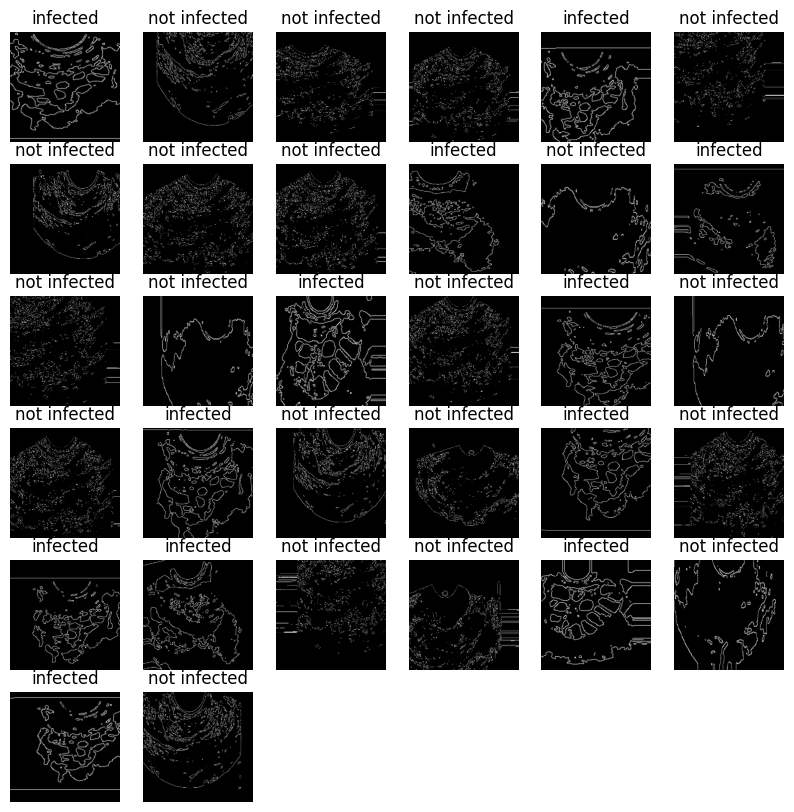

In [7]:
class_names = train_df_new.class_names
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_df_new.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

### Making of Data C

* Extracting follicle images of 250 normal follicle images

In [4]:

input_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_notinfected"
follicles_output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected"

image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))][:250]  # Limit to first 250 images
idx = 0

for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    follicle_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the follicle image is not empty
    if follicle_image.size != 0:
        follicle_output_path = os.path.join(follicles_output_dir, f"Follicle_{image_file[:-4]}_{idx}.png")
        idx = idx + 1

        cv2.imwrite(follicle_output_path, follicle_image)
        print(f"Follicle image saved: {follicle_output_path}")


Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Copy of img_0_9989_0_0.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Copy of img_0_9989_1_1.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Copy of img_0_9989_2_2.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Copy of img_0_9989_3_3.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Copy of img_0_9989_4_4.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Copy of img_0_9989_5_5.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Copy of img_0_9989_6_6.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\notinfected\Follicle_Follicle_Cop

* Extracting follicle images of 120 PCOS infected follicle images

In [5]:

input_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\follicle_image_infected"
follicles_output_dir = r"C:\Users\KIIT\Desktop\PCOS detection\data\Data D\infected"

image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))][:120]
idx = 0

for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    follicle_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if follicle_image.size != 0:
        follicle_output_path = os.path.join(follicles_output_dir, f"Follicle_{image_file[:-4]}_{idx}.png")
        idx = idx + 1

        cv2.imwrite(follicle_output_path, follicle_image)
        print(f"Follicle image saved: {follicle_output_path}")


Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img10_0_0.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img10_1_1.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img10_2_2.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img10_3_3.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img1_0_4.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img1_1_5.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img1_2_6.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img1_3_7.png
Follicle image saved: C:\Users\KIIT\Desktop\PCOS detection\data\Data C\infected\Follicle_Follicle_img1_4_8.p

#### Extracting texture features from follicle images of train data

In [2]:
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy, kurtosis, skew

def extract_texture_features(image):
    mean_value = np.mean(image)
    entropy_value = entropy(image.flatten())
    kurtosis_value = kurtosis(image.flatten())
    skewness_value = skew(image.flatten())
    variance_value = np.var(image)

    return mean_value, entropy_value, kurtosis_value, skewness_value, variance_value

def process_dataset(image_dir, label, output_file):
    features = []

    for filename in os.listdir(image_dir):
        if filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                texture_features = extract_texture_features(image)
                features.append([label] + list(texture_features))

    with open(output_file, "a") as f: 
        for feature in features:
            f.write(",".join(map(str, feature)) + "\n")

follice_normal = r"C:\Users\KIIT\Desktop\PCOS detection\data\follicle images\notinfected"
follicle_infected = r"C:\Users\KIIT\Desktop\PCOS detection\data\follicle images\infected"
output_file_D = r"C:\Users\KIIT\Desktop\PCOS detection\data\data_D_features.csv"

process_dataset(follicle_infected, 1, output_file_D)
process_dataset(follice_normal, 0, output_file_D)

print("Feature extraction completed.")


Feature extraction completed.


### Using Binary SVM classifier to train the model

In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

df_train = pd.read_csv(r"C:\Users\KIIT\Desktop\PCOS detection\data\data_C_features.csv")

X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

df_test = pd.read_csv(r"C:\Users\KIIT\Desktop\PCOS detection\data\data_B_features.csv")

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_train_pred = svm_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", accuracy)

y_test_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Train Accuracy: 0.7432432432432432
Test Accuracy: 0.7986725663716814
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       881
           1       0.07      0.61      0.13        23

    accuracy                           0.80       904
   macro avg       0.53      0.71      0.51       904
weighted avg       0.96      0.80      0.87       904



#### Obtaining a confusion matrix for better visualization of the accuracy

Confusion Matrix:
[[708 173]
 [  9  14]]


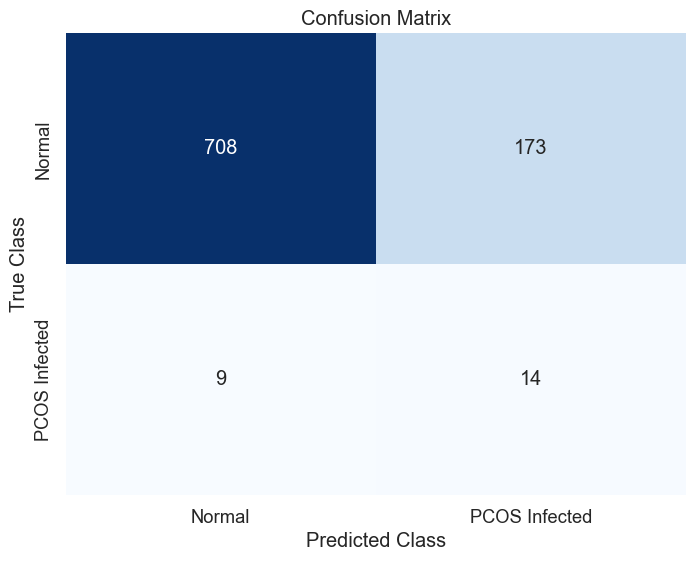

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

conf_labels = ["Normal", "PCOS Infected"]

sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=conf_labels,yticklabels=conf_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()